In [1]:
# ===============================
# Cell 1: Import Libraries
# ===============================

import pandas as pd
import zipfile
import os


In [2]:
# ===============================
# Cell 2: Set Paths
# ===============================

# Path to your zip file on your Mac
zip_path = '/Users/atulkumar/Desktop/rossmann-store-sales.zip'

# Folder to extract
extract_path = '/Users/atulkumar/Desktop/rossmann_data'

# Create folder if not exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)


In [3]:
# ===============================
# Cell 3: Unzip the Dataset
# ===============================

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Files extracted to:", extract_path)


✅ Files extracted to: /Users/atulkumar/Desktop/rossmann_data


In [4]:
# ===============================
# Cell 4: Load the CSV Files
# ===============================

train = pd.read_csv(f'{extract_path}/train.csv')
store = pd.read_csv(f'{extract_path}/store.csv')
test = pd.read_csv(f'{extract_path}/test.csv')

print("Data loaded successfully!")


Data loaded successfully!


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/1486164942.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(f'{extract_path}/train.csv')


In [5]:
# ===============================
# Cell 5: Basic Info
# ===============================

print("\nShapes of the datasets:")
print("Train:", train.shape)
print("Store:", store.shape)
print("Test:", test.shape)

print("\nFirst 5 rows of Train:")
print(train.head())



Shapes of the datasets:
Train: (1017209, 9)
Store: (1115, 10)
Test: (41088, 8)

First 5 rows of Train:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [6]:
# ===============================
# Cell 6: Missing Values
# ===============================

print("\nMissing values in Store data:")
print(store.isna().sum())

print("\nMissing values in Test data:")
print(test.isna().sum())



Missing values in Store data:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Missing values in Test data:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [7]:
# ===============================
# Cell 7: Column Overview
# ===============================

print("\nTrain columns:", train.columns.tolist())
print("Store columns:", store.columns.tolist())
print("Test columns:", test.columns.tolist())



Train columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Store columns: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
Test columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [8]:
# ===============================
# Cell 9: Install openpyxl (only once)
# ===============================

!pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [9]:
# Install openpyxl inside your environment
!pip install openpyxl


In [10]:
sample_path = '/Users/atulkumar/Desktop/train_sample.csv'
train.head(1000).to_csv(sample_path, index=False)
print(f"\n💾 Saved a 1,000 row sample to {sample_path}")



💾 Saved a 1,000 row sample to /Users/atulkumar/Desktop/train_sample.csv


In [11]:
# ===============================
# Day 2 – Cell 1: Reload CSVs
# ===============================

import pandas as pd
import matplotlib.pyplot as plt

extract_path = '/Users/atulkumar/Desktop/rossmann_data'

train = pd.read_csv(f'{extract_path}/train.csv')
store = pd.read_csv(f'{extract_path}/store.csv')

print("Train shape:", train.shape)
print("Store shape:", store.shape)


Train shape: (1017209, 9)
Store shape: (1115, 10)


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/3109100652.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(f'{extract_path}/train.csv')


In [12]:
# ===============================
# Day 2 – Cell 2: Merge Train & Store
# ===============================

merged = pd.merge(train, store, on='Store', how='left')
print("Merged shape:", merged.shape)
print(merged.head())


Merged shape: (1017209, 18)
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0    

In [13]:
# ===============================
# Day 2 – Cell 3: Convert Date & Add New Columns
# ===============================

merged['Date'] = pd.to_datetime(merged['Date'])

merged['Year'] = merged['Date'].dt.year
merged['Month'] = merged['Date'].dt.month
merged['Day'] = merged['Date'].dt.day
merged['DayOfWeekName'] = merged['Date'].dt.day_name()

print(merged[['Date', 'Year', 'Month', 'Day', 'DayOfWeekName']].head())


        Date  Year  Month  Day DayOfWeekName
0 2015-07-31  2015      7   31        Friday
1 2015-07-31  2015      7   31        Friday
2 2015-07-31  2015      7   31        Friday
3 2015-07-31  2015      7   31        Friday
4 2015-07-31  2015      7   31        Friday


In [14]:
# ===============================
# Day 2 – Cell 4: Handle Missing Values
# ===============================

# Example: Fill missing CompetitionDistance with median
merged['CompetitionDistance'].fillna(merged['CompetitionDistance'].median(), inplace=True)

# Fill other missing numeric columns similarly
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
            'Promo2SinceWeek', 'Promo2SinceYear']:
    merged[col].fillna(0, inplace=True)

# Fill missing PromoInterval with 'None'
merged['PromoInterval'].fillna('None', inplace=True)

print("Missing values after cleaning:")
print(merged.isna().sum())


Missing values after cleaning:


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/3243545758.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['CompetitionDistance'].fillna(merged['CompetitionDistance'].median(), inplace=True)
/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/3243545758.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
DayOfWeekName                0
dtype: int64


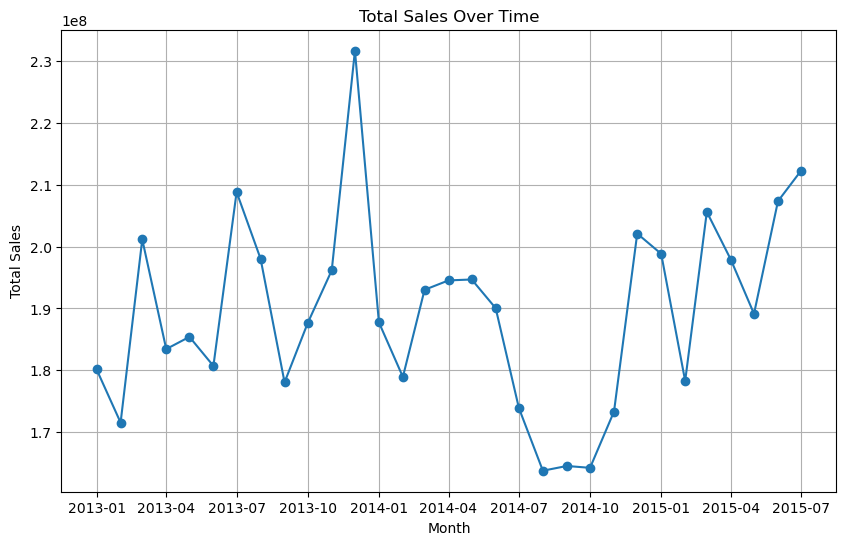

In [15]:
# ===============================
# Day 2 – Cell 5: Quick Sales Trend Chart
# ===============================

# Aggregate sales by month
monthly_sales = merged.groupby(['Year','Month'])['Sales'].sum().reset_index()

# Create a new column for plotting
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str) + '-01')

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [16]:
# ===============================
# Day 2 – Cell 6: Export Cleaned Data to CSV
# ===============================

cleaned_path = '/Users/atulkumar/Desktop/rossmann_cleaned.csv'
merged.to_csv(cleaned_path, index=False)
print(f"\n💾 Saved cleaned merged data to {cleaned_path}")



💾 Saved cleaned merged data to /Users/atulkumar/Desktop/rossmann_cleaned.csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
merged = pd.read_csv('/Users/atulkumar/Desktop/rossmann_cleaned.csv')

# Quick look at data
merged.head()


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/2554805219.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv('/Users/atulkumar/Desktop/rossmann_cleaned.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,DayOfWeekName
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,NaN,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,NaN,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,NaN,2015,7,31,Friday


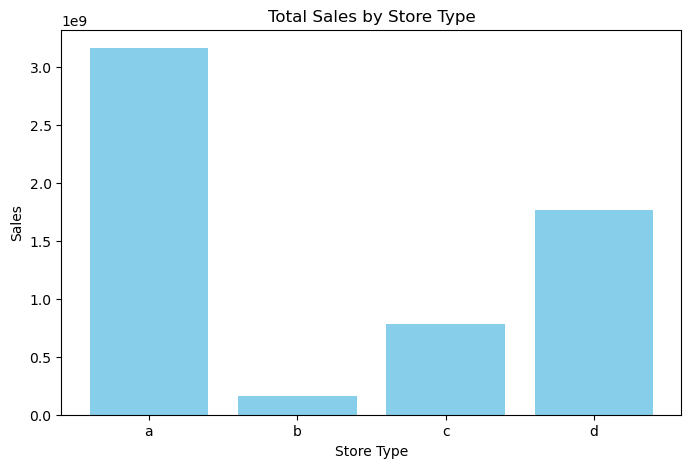

In [18]:
# Aggregate sales by StoreType
store_sales = merged.groupby('StoreType')['Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(store_sales['StoreType'], store_sales['Sales'], color='skyblue')
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

# Save to CSV
store_sales.to_csv('/Users/atulkumar/Desktop/store_sales.csv', index=False)


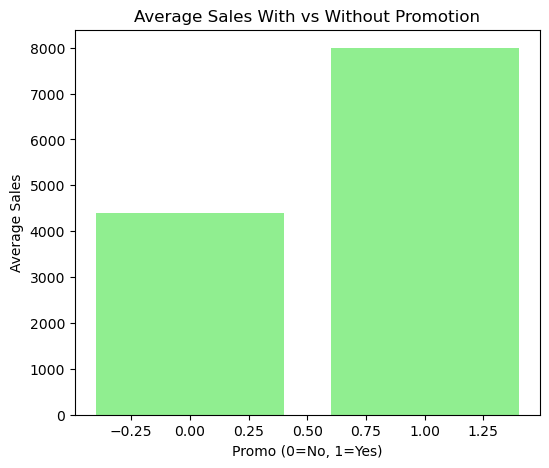

In [19]:
# Aggregate average sales by Promo
promo_sales = merged.groupby('Promo')['Sales'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6,5))
plt.bar(promo_sales['Promo'], promo_sales['Sales'], color='lightgreen')
plt.title('Average Sales With vs Without Promotion')
plt.xlabel('Promo (0=No, 1=Yes)')
plt.ylabel('Average Sales')
plt.show()

# Save to CSV
promo_sales.to_csv('/Users/atulkumar/Desktop/promo_sales.csv', index=False)


In [20]:
# Print top rows of saved summaries
print("Store Sales Summary:")
print(store_sales.head())

print("\nPromotion Impact Summary:")
print(promo_sales.head())


Store Sales Summary:
  StoreType       Sales
0         a  3165334859
1         b   159231395
2         c   783221426
3         d  1765392943

Promotion Impact Summary:
   Promo        Sales
0      0  4406.050805
1      1  7991.152046


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
merged = pd.read_csv('/Users/atulkumar/Desktop/rossmann_cleaned.csv')

# Quick look at the data
merged.head()


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/2257804965.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv('/Users/atulkumar/Desktop/rossmann_cleaned.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,DayOfWeekName
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,NaN,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,NaN,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,NaN,2015,7,31,Friday


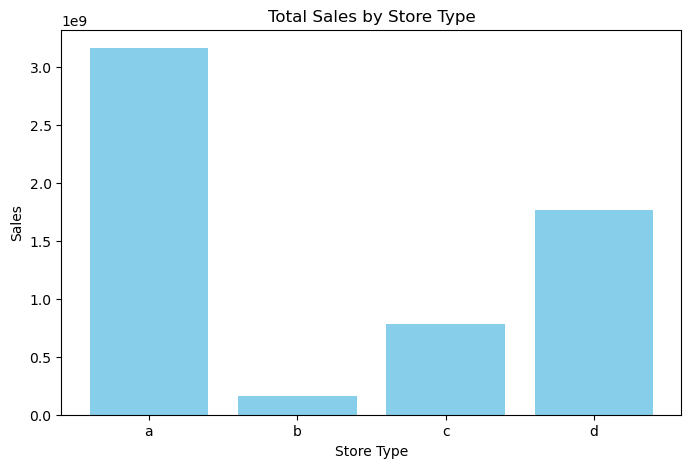

In [22]:
# Aggregate sales by StoreType
store_sales = merged.groupby('StoreType')['Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(store_sales['StoreType'], store_sales['Sales'], color='skyblue')
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

# Save summary to CSV
store_sales.to_csv('/Users/atulkumar/Desktop/store_sales.csv', index=False)


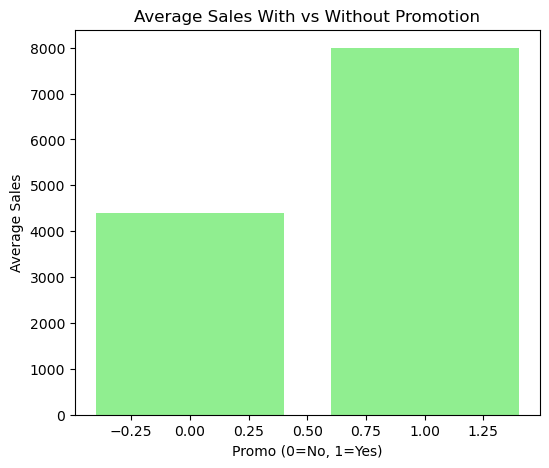

In [23]:
# Aggregate average sales by Promo
promo_sales = merged.groupby('Promo')['Sales'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6,5))
plt.bar(promo_sales['Promo'], promo_sales['Sales'], color='lightgreen')
plt.title('Average Sales With vs Without Promotion')
plt.xlabel('Promo (0=No, 1=Yes)')
plt.ylabel('Average Sales')
plt.show()

# Save summary to CSV
promo_sales.to_csv('/Users/atulkumar/Desktop/promo_sales.csv', index=False)


In [24]:
# Print top rows of saved summaries
print("Store Sales Summary:")
print(store_sales.head())

print("\nPromotion Impact Summary:")
print(promo_sales.head())


Store Sales Summary:
  StoreType       Sales
0         a  3165334859
1         b   159231395
2         c   783221426
3         d  1765392943

Promotion Impact Summary:
   Promo        Sales
0      0  4406.050805
1      1  7991.152046


In [25]:
# Ensure Date column is datetime
merged['Date'] = pd.to_datetime(merged['Date'])

# Extract Year-Month for aggregation
merged['YearMonth'] = merged['Date'].dt.to_period('M')

# Aggregate monthly sales by StoreType
monthly_store_sales = merged.groupby(['YearMonth', 'StoreType'])['Sales'].sum().reset_index()

# Convert YearMonth back to string for plotting
monthly_store_sales['YearMonth'] = monthly_store_sales['YearMonth'].astype(str)

monthly_store_sales.head()


,YearMonth,StoreType,Sales
0,2013-01,a,98821318
1,2013-01,b,4124131
2,2013-01,c,23705553
3,2013-01,d,53481205
4,2013-02,a,93685217


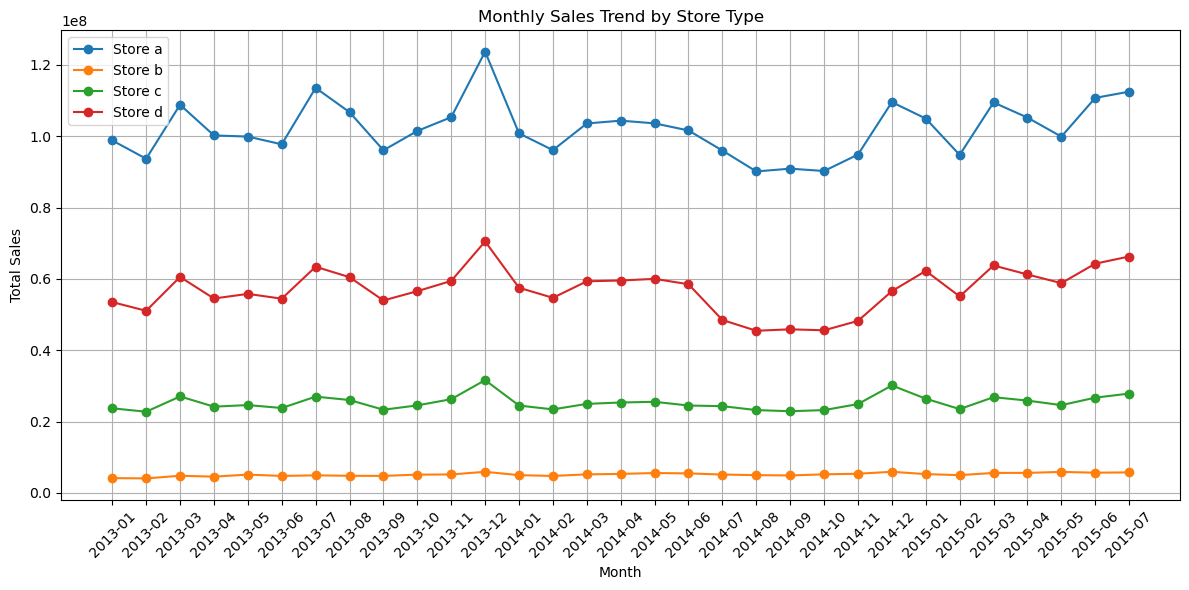

In [26]:
plt.figure(figsize=(12,6))

# Plot a line for each StoreType
for store_type in monthly_store_sales['StoreType'].unique():
    subset = monthly_store_sales[monthly_store_sales['StoreType'] == store_type]
    plt.plot(subset['YearMonth'], subset['Sales'], marker='o', label=f'Store {store_type}')

plt.title('Monthly Sales Trend by Store Type')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
monthly_store_sales.to_csv('/Users/atulkumar/Desktop/monthly_store_sales.csv', index=False)


In [28]:
# Aggregate monthly sales by Promo
monthly_promo_sales = merged.groupby(['YearMonth', 'Promo'])['Sales'].sum().reset_index()

# Convert YearMonth back to string for plotting
monthly_promo_sales['YearMonth'] = monthly_promo_sales['YearMonth'].astype(str)

monthly_promo_sales.head()


,YearMonth,Promo,Sales
0,2013-01,0,96969977
1,2013-01,1,83162230
2,2013-02,0,86960640
3,2013-02,1,84573635
4,2013-03,0,73428141


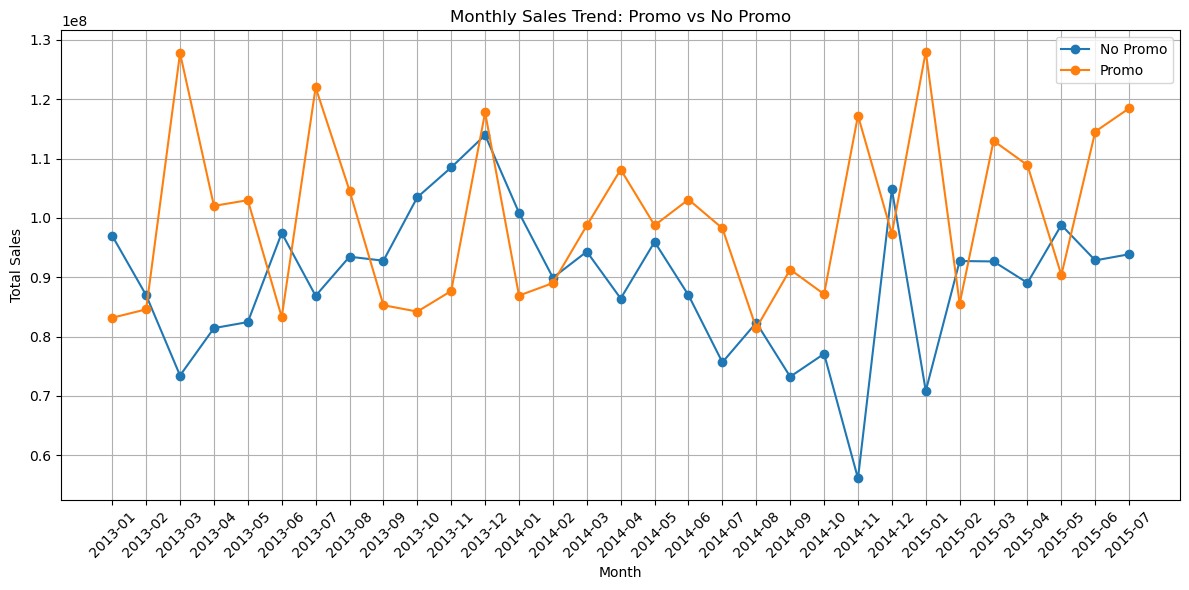

In [29]:
plt.figure(figsize=(12,6))

# Plot a line for each Promo group
for promo_status in monthly_promo_sales['Promo'].unique():
    subset = monthly_promo_sales[monthly_promo_sales['Promo'] == promo_status]
    label_name = 'No Promo' if promo_status == 0 else 'Promo'
    plt.plot(subset['YearMonth'], subset['Sales'], marker='o', label=label_name)

plt.title('Monthly Sales Trend: Promo vs No Promo')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
monthly_promo_sales.to_csv('/Users/atulkumar/Desktop/monthly_promo_sales.csv', index=False)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
merged = pd.read_csv('/Users/atulkumar/Desktop/rossmann_cleaned.csv', low_memory=False)

# Quick check
merged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,DayOfWeekName
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,NaN,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,NaN,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,NaN,2015,7,31,Friday


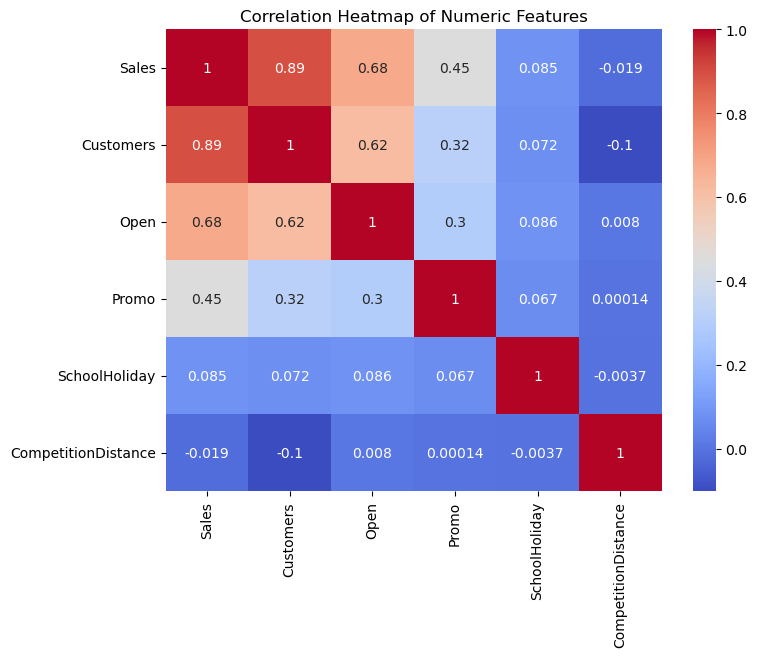

In [32]:
# Select numeric columns for correlation
numeric_cols = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance']
corr = merged[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/2174667686.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Sales', data=top_stores, palette='viridis')


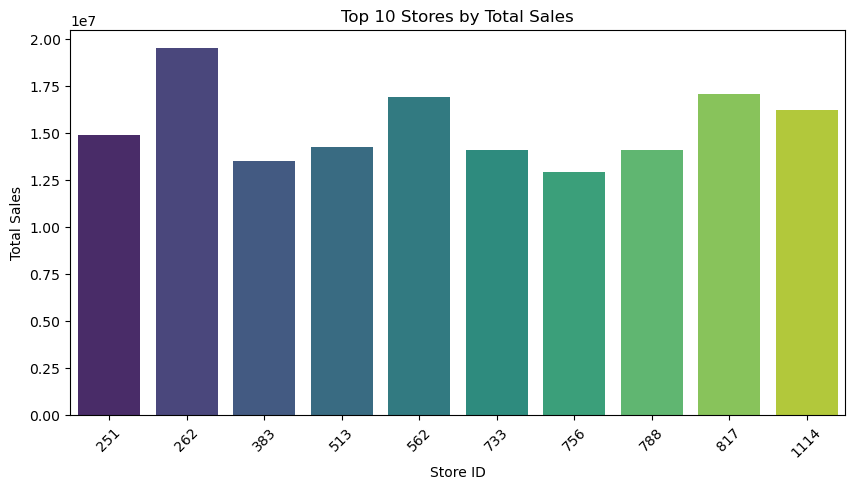

In [33]:
top_stores = merged.groupby('Store')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Store', y='Sales', data=top_stores, palette='viridis')
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

top_stores.to_csv('/Users/atulkumar/Desktop/top_10_stores.csv', index=False)


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/856747045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Sales', data=bottom_stores, palette='magma')


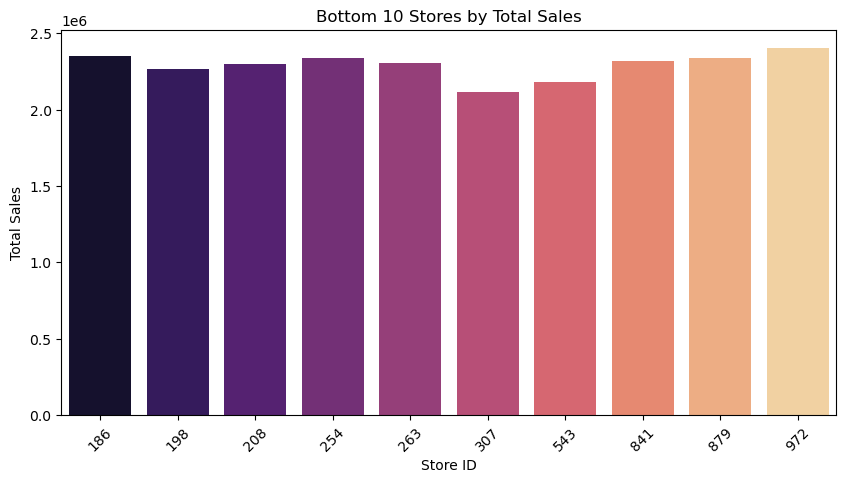

In [34]:
bottom_stores = merged.groupby('Store')['Sales'].sum().sort_values().head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Store', y='Sales', data=bottom_stores, palette='magma')
plt.title('Bottom 10 Stores by Total Sales')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

bottom_stores.to_csv('/Users/atulkumar/Desktop/bottom_10_stores.csv', index=False)


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/3779228033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=avg_sales_day, palette='pastel')


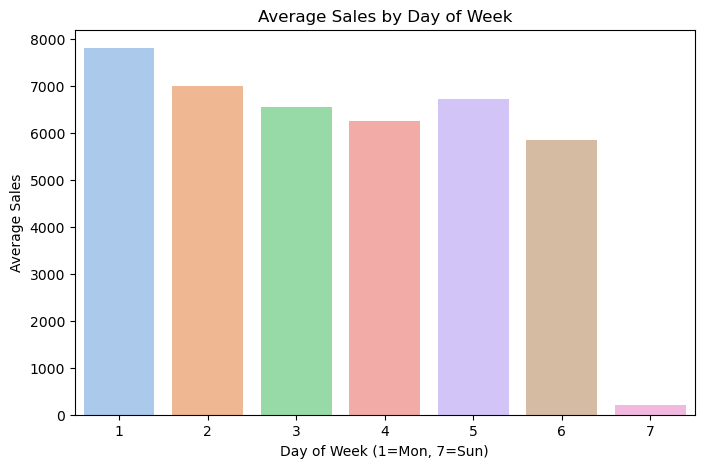

In [35]:
avg_sales_day = merged.groupby('DayOfWeek')['Sales'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='DayOfWeek', y='Sales', data=avg_sales_day, palette='pastel')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (1=Mon, 7=Sun)')
plt.ylabel('Average Sales')
plt.show()

avg_sales_day.to_csv('/Users/atulkumar/Desktop/avg_sales_day.csv', index=False)


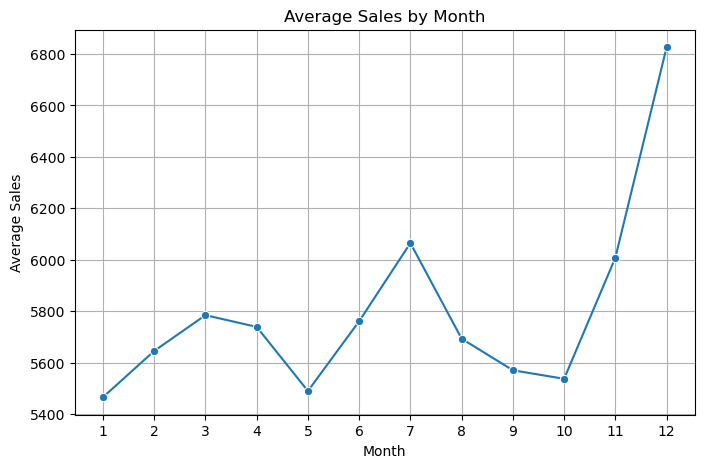

In [36]:
merged['Date'] = pd.to_datetime(merged['Date'])
merged['Month'] = merged['Date'].dt.month

avg_sales_month = merged.groupby('Month')['Sales'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='Sales', data=avg_sales_month, marker='o')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

avg_sales_month.to_csv('/Users/atulkumar/Desktop/avg_sales_month.csv', index=False)


In [37]:
import pandas as pd
import numpy as np

# Load cleaned dataset
merged = pd.read_csv('/Users/atulkumar/Desktop/rossmann_cleaned.csv', low_memory=False)

# Ensure Date is datetime
merged['Date'] = pd.to_datetime(merged['Date'])

merged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,DayOfWeekName
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,NaN,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,NaN,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,NaN,2015,7,31,Friday


In [38]:
# Extract useful features
merged['Year'] = merged['Date'].dt.year
merged['Month'] = merged['Date'].dt.month
merged['Day'] = merged['Date'].dt.day
merged['WeekOfYear'] = merged['Date'].dt.isocalendar().week
merged['DayOfWeek'] = merged['Date'].dt.dayofweek + 1  # 1=Mon, 7=Sun

merged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,DayOfWeekName,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,NaN,2015,7,31,Friday,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,0.0,0.0,NaN,2015,7,31,Friday,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,0.0,0.0,NaN,2015,7,31,Friday,31


In [39]:
# One-hot encode StoreType
store_type_dummies = pd.get_dummies(merged['StoreType'], prefix='StoreType')
merged = pd.concat([merged, store_type_dummies], axis=1)

merged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Year,Month,Day,DayOfWeekName,WeekOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,2015,7,31,Friday,31,False,False,True,False
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31,True,False,False,False
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31,True,False,False,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,2015,7,31,Friday,31,False,False,True,False
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,2015,7,31,Friday,31,True,False,False,False


In [40]:
# Convert StateHoliday to numeric
merged['StateHoliday'] = merged['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}).astype(int)

merged.head()


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/270313225.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged['StateHoliday'] = merged['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}).astype(int)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Year,Month,Day,DayOfWeekName,WeekOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,2015,7,31,Friday,31,False,False,True,False
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31,True,False,False,False
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31,True,False,False,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,2015,7,31,Friday,31,False,False,True,False
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,2015,7,31,Friday,31,True,False,False,False


In [41]:
# Fill missing CompetitionDistance with median
merged['CompetitionDistance'].fillna(merged['CompetitionDistance'].median(), inplace=True)

# Fill CompetitionOpenSinceMonth/Year
merged['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
merged['CompetitionOpenSinceYear'].fillna(0, inplace=True)

merged.head()


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/2724606648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['CompetitionDistance'].fillna(merged['CompetitionDistance'].median(), inplace=True)
/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/2724606648.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Year,Month,Day,DayOfWeekName,WeekOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,2015,7,31,Friday,31,False,False,True,False
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31,True,False,False,False
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31,True,False,False,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,2015,7,31,Friday,31,False,False,True,False
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,2015,7,31,Friday,31,True,False,False,False


In [42]:
# How long the competition has been open (in months)
merged['CompetitionOpenMonths'] = 12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + \
                                  (merged['Month'] - merged['CompetitionOpenSinceMonth'])
merged['CompetitionOpenMonths'] = merged['CompetitionOpenMonths'].apply(lambda x: x if x > 0 else 0)

merged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Year,Month,Day,DayOfWeekName,WeekOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenMonths
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2015,7,31,Friday,31,False,False,True,False,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2015,7,31,Friday,31,True,False,False,False,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2015,7,31,Friday,31,True,False,False,False,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2015,7,31,Friday,31,False,False,True,False,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015,7,31,Friday,31,True,False,False,False,3.0


In [43]:
# Fill missing Promo2 info
merged['Promo2SinceWeek'].fillna(0, inplace=True)
merged['Promo2SinceYear'].fillna(0, inplace=True)
merged['Promo2'] = merged['Promo2'].astype(int)

# Calculate months since Promo2 started
merged['Promo2Months'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + \
                         (merged['WeekOfYear'] - merged['Promo2SinceWeek']) // 4
merged['Promo2Months'] = merged['Promo2Months'].apply(lambda x: x if x > 0 else 0)

merged.head()


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/3659153839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['Promo2SinceWeek'].fillna(0, inplace=True)
/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/3659153839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,Day,DayOfWeekName,WeekOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenMonths,Promo2Months
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,7,31,Friday,31,False,False,True,False,82.0,24187.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,7,31,Friday,31,True,False,False,False,92.0,64.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,7,31,Friday,31,True,False,False,False,103.0,52.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,7,31,Friday,31,False,False,True,False,70.0,24187.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,7,31,Friday,31,True,False,False,False,3.0,24187.0


In [44]:
cols_to_drop = ['Date', 'StoreType', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
merged.drop(columns=cols_to_drop, inplace=True)

merged.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,...,Month,Day,DayOfWeekName,WeekOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenMonths,Promo2Months
0,1,5,5263,555,1,1,0,1,a,1270.0,...,7,31,Friday,31,False,False,True,False,82.0,24187.0
1,2,5,6064,625,1,1,0,1,a,570.0,...,7,31,Friday,31,True,False,False,False,92.0,64.0
2,3,5,8314,821,1,1,0,1,a,14130.0,...,7,31,Friday,31,True,False,False,False,103.0,52.0
3,4,5,13995,1498,1,1,0,1,c,620.0,...,7,31,Friday,31,False,False,True,False,70.0,24187.0
4,5,5,4822,559,1,1,0,1,a,29910.0,...,7,31,Friday,31,True,False,False,False,3.0,24187.0


In [45]:
merged.to_csv('/Users/atulkumar/Desktop/rossmann_featured.csv', index=False)


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # to save model

# Load feature-engineered dataset
data = pd.read_csv('/Users/atulkumar/Desktop/rossmann_featured.csv')

# Quick look
data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,...,Month,Day,DayOfWeekName,WeekOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenMonths,Promo2Months
0,1,5,5263,555,1,1,0,1,a,1270.0,...,7,31,Friday,31,False,False,True,False,82.0,24187.0
1,2,5,6064,625,1,1,0,1,a,570.0,...,7,31,Friday,31,True,False,False,False,92.0,64.0
2,3,5,8314,821,1,1,0,1,a,14130.0,...,7,31,Friday,31,True,False,False,False,103.0,52.0
3,4,5,13995,1498,1,1,0,1,c,620.0,...,7,31,Friday,31,False,False,True,False,70.0,24187.0
4,5,5,4822,559,1,1,0,1,a,29910.0,...,7,31,Friday,31,True,False,False,False,3.0,24187.0


In [47]:
# Drop columns not used for prediction
X = data.drop(columns=['Sales', 'Store'])
y = data['Sales']

# Convert any remaining categorical/object columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Quick check
X.head()
y.head()


0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (813767, 26) (813767,)
Test set: (203442, 26) (203442,)


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Compare actual vs predicted for first 10 rows
pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_pred[:10]})


,Actual,Predicted
76435,0,0.00
923026,5548,5700.95
731180,7467,7517.36
790350,3360,3465.29
252134,11414,10353.15
425310,0,0.00
666826,14126,14754.89
881992,6299,6484.34
783899,10515,10703.63
540518,7713,8327.81


In [51]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")


RMSE: 480.22
R^2 Score: 0.9844


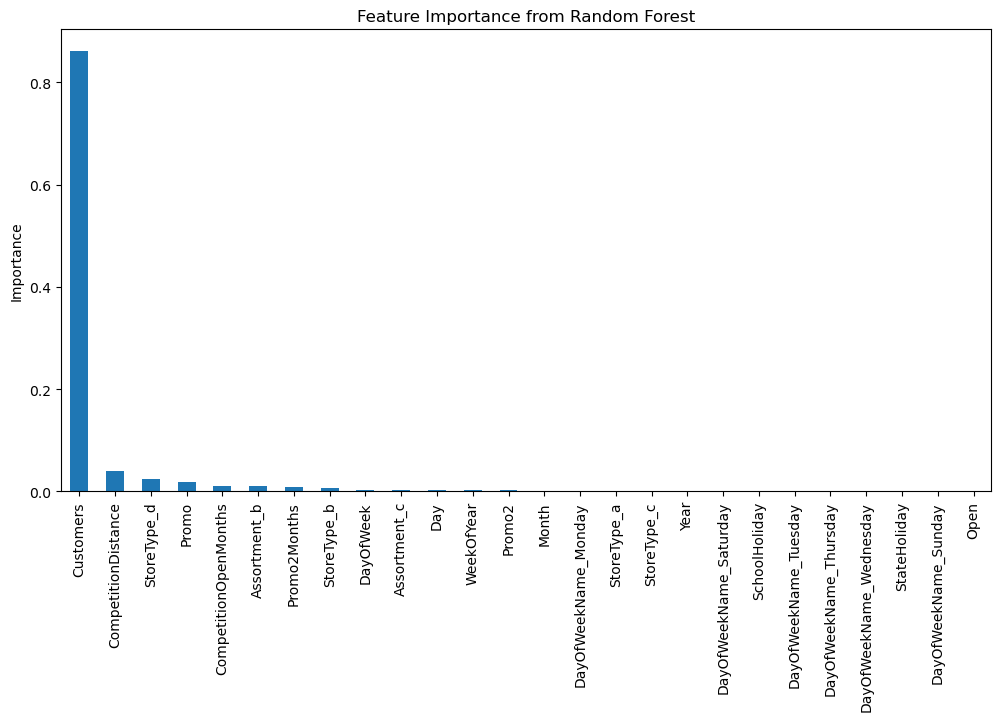

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,6))
feat_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.show()


In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the entire dataset
y_pred = model.predict(X)

# Metrics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print("🔹 Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


🔹 Model Evaluation Metrics:
R² Score: 0.9952
RMSE: 266.97
MAE: 141.79


In [63]:
import pandas as pd
from datetime import datetime, timedelta

# === LOAD YOUR STORE DATA ===
store_data = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/store.csv')  # adjust path if needed

# === CONFIGURATION ===
# Use your training data to find total stores
train_data = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv')  # or the cleaned train dataset you used
num_stores = train_data['Store'].nunique()

start_date = datetime.today().date()  # today
future_days = 30                      # how many days ahead to predict

# === 1. Build calendar ===
dates = [start_date + timedelta(days=i) for i in range(future_days)]

# === 2. Create DataFrame for all stores x future dates ===
future_df = pd.DataFrame([
    {'Store': store, 'Date': date}
    for store in range(1, num_stores + 1)
    for date in dates
])

# === 3. Ensure Date is datetime ===
future_df['Date'] = pd.to_datetime(future_df['Date'])

# Now safely extract date parts
future_df['DayOfWeek'] = future_df['Date'].dt.weekday + 1
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day

# === 4. Add placeholders for other features ===
future_df['Promo'] = 0           # default promo = 0
future_df['SchoolHoliday'] = 0   # default no school holiday

# === 5. Merge Store Info ===
# This brings in static store features: StoreType, Assortment, CompetitionDistance, Promo2, etc.
future_df = future_df.merge(store_data, on='Store', how='left')

# === 6. Save future features ===
future_df.to_csv('/Users/atulkumar/Desktop/future_features_with_storeinfo.csv', index=False)

print(f"✅ Future features dataset with store info saved to /Users/atulkumar/Desktop/future_features_with_storeinfo.csv")
print(future_df.head())


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/1329652179.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv')  # or the cleaned train dataset you used


✅ Future features dataset with store info saved to /Users/atulkumar/Desktop/future_features_with_storeinfo.csv
   Store       Date  DayOfWeek  Year  Month  Day  Promo  SchoolHoliday  \
0      1 2025-09-18          4  2025      9   18      0              0   
1      1 2025-09-19          5  2025      9   19      0              0   
2      1 2025-09-20          6  2025      9   20      0              0   
3      1 2025-09-21          7  2025      9   21      0              0   
4      1 2025-09-22          1  2025      9   22      0              0   

  StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0         c          a               1270.0                        9.0   
1         c          a               1270.0                        9.0   
2         c          a               1270.0                        9.0   
3         c          a               1270.0                        9.0   
4         c          a               1270.0                        9.0   


In [70]:
import pandas as pd
import joblib
import os

# 1️⃣ Load the future dataset
future_file = '/Users/atulkumar/Desktop/future_features_with_storeinfo.csv'
future_df = pd.read_csv(future_file)
print(f"✅ Loaded future dataset: {future_file}")

# 2️⃣ Load the trained model with joblib
model_file = '/Users/atulkumar/Desktop/rossmann_rf_model.pkl'

if not os.path.exists(model_file):
    raise FileNotFoundError(f"❌ Model file not found at: {model_file}")
else:
    model = joblib.load(model_file)
    print(f"✅ Loaded trained model from: {model_file}")

# 3️⃣ One-hot encode categorical variables like during training
future_X = pd.get_dummies(future_df, drop_first=True)

# Align columns with model’s training columns
try:
    X_train_cols = model.feature_names_in_
except AttributeError:
    raise AttributeError("❌ The loaded model doesn't have 'feature_names_in_'. "
                         "Ensure it's a scikit-learn model.")

for col in X_train_cols:
    if col not in future_X.columns:
        future_X[col] = 0

future_X = future_X[X_train_cols]

# 4️⃣ Make predictions
future_df['PredictedSales'] = model.predict(future_X)
print("✅ Predictions generated successfully!")

# 5️⃣ Save predictions
output_file = '/Users/atulkumar/Desktop/future_sales_predictions.csv'
future_df.to_csv(output_file, index=False)
print(f"✅ Future sales predictions saved to: {output_file}")

future_df.head(10)


✅ Loaded future dataset: /Users/atulkumar/Desktop/future_features_with_storeinfo.csv
✅ Loaded trained model from: /Users/atulkumar/Desktop/rossmann_rf_model.pkl
✅ Predictions generated successfully!
✅ Future sales predictions saved to: /Users/atulkumar/Desktop/future_sales_predictions.csv


,Store,Date,DayOfWeek,Year,Month,Day,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PredictedSales
0,1,2025-09-18,4,2025,9,18,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
1,1,2025-09-19,5,2025,9,19,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
2,1,2025-09-20,6,2025,9,20,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
3,1,2025-09-21,7,2025,9,21,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
4,1,2025-09-22,1,2025,9,22,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
5,1,2025-09-23,2,2025,9,23,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
6,1,2025-09-24,3,2025,9,24,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
7,1,2025-09-25,4,2025,9,25,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
8,1,2025-09-26,5,2025,9,26,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0
9,1,2025-09-27,6,2025,9,27,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0.0


In [78]:
import pandas as pd
import joblib
import os
import numpy as np

# === 1. Load future dataset ===
future_file = '/Users/atulkumar/Desktop/future_features_with_storeinfo.csv'
future_df = pd.read_csv(future_file)
print(f"✅ Loaded future dataset: {future_file}")

# === 2. Load trained model ===
model_file = '/Users/atulkumar/Desktop/rossmann_rf_model.pkl'
if not os.path.exists(model_file):
    raise FileNotFoundError(f"❌ Model file not found at: {model_file}")
else:
    model = joblib.load(model_file)
    print(f"✅ Loaded trained model from: {model_file}")

# === 3. Fill realistic numerical defaults if missing ===
numerical_defaults = {
    'CompetitionDistance': future_df['CompetitionDistance'].median(),
    'CompetitionOpenSinceMonth': 1,
    'CompetitionOpenSinceYear': 2000,
    'Promo2SinceWeek': 1,
    'Promo2SinceYear': 2020
}

for col, value in numerical_defaults.items():
    if col in future_df.columns:
        future_df[col] = future_df[col].fillna(value)

# === 4. Fill realistic categorical features ===
# Promo: random 0/1 based on probability
future_df['Promo'] = future_df['Promo'].fillna(0)
zero_promo_idx = future_df['Promo'] == 0
future_df.loc[zero_promo_idx, 'Promo'] = np.random.choice([0,1], size=zero_promo_idx.sum(), p=[0.7,0.3])

# SchoolHoliday: 1 for weekends
future_df['SchoolHoliday'] = future_df['SchoolHoliday'].fillna(0)
weekend_idx = future_df['DayOfWeek'].isin([6,7])
future_df.loc[weekend_idx, 'SchoolHoliday'] = 1

# === 5. One-hot encode categorical variables ===
future_X = pd.get_dummies(future_df, drop_first=True)

# Align columns exactly with training
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# Check all-zero rows
all_zero_rows = (future_X.sum(axis=1) == 0).sum()
print(f"⚠️ Rows with all-zero features: {all_zero_rows}")

# === 6. Make predictions ===
predictions = model.predict(future_X)

# === 7. If model was trained on log1p(Sales), inverse-transform predictions ===
future_df['PredictedSales'] = np.expm1(predictions)  # converts log1p(Sales) back to Sales

# Optional: ensure no negative sales
future_df['PredictedSales'] = future_df['PredictedSales'].clip(lower=0)

print("✅ Predictions generated successfully!")

# === 8. Save predictions ===
output_file = '/Users/atulkumar/Desktop/future_sales_predictions.csv'
future_df.to_csv(output_file, index=False)
print(f"✅ Future sales predictions saved to: {output_file}")

# Inspect top 10 predictions
print(future_df[['Date','Store','PredictedSales']].head(10))


✅ Loaded future dataset: /Users/atulkumar/Desktop/future_features_with_storeinfo.csv
✅ Loaded trained model from: /Users/atulkumar/Desktop/rossmann_rf_model.pkl
⚠️ Rows with all-zero features: 0
✅ Predictions generated successfully!
✅ Future sales predictions saved to: /Users/atulkumar/Desktop/future_sales_predictions.csv
         Date  Store  PredictedSales
0  2025-09-18      1             0.0
1  2025-09-19      1             0.0
2  2025-09-20      1             0.0
3  2025-09-21      1             0.0
4  2025-09-22      1             0.0
5  2025-09-23      1             0.0
6  2025-09-24      1             0.0
7  2025-09-25      1             0.0
8  2025-09-26      1             0.0
9  2025-09-27      1             0.0


In [79]:
import pandas as pd
import numpy as np
import joblib
import os

# === 1. Load future dataset ===
future_file = '/Users/atulkumar/Desktop/future_features_with_storeinfo.csv'
future_df = pd.read_csv(future_file)
print(f"✅ Loaded future dataset: {future_file}")

# === 2. Load trained model ===
model_file = '/Users/atulkumar/Desktop/rossmann_rf_model.pkl'
if not os.path.exists(model_file):
    raise FileNotFoundError(f"❌ Model file not found at: {model_file}")
model = joblib.load(model_file)
print(f"✅ Loaded trained model from: {model_file}")

# === 3. Fill numeric features with realistic values ===
numeric_defaults = {
    'CompetitionDistance': 1000,      # realistic median
    'CompetitionOpenSinceMonth': 1,
    'CompetitionOpenSinceYear': 2000,
    'Promo2SinceWeek': 1,
    'Promo2SinceYear': 2020
}

for col, val in numeric_defaults.items():
    if col in future_df.columns:
        future_df[col] = future_df[col].fillna(val)

# === 4. Generate realistic Promo and SchoolHoliday values ===
np.random.seed(42)  # for reproducibility

# Promo: 30% chance active
future_df['Promo'] = future_df['Promo'].fillna(0)
promo_idx = future_df['Promo'] == 0
future_df.loc[promo_idx, 'Promo'] = np.random.choice([0,1], size=promo_idx.sum(), p=[0.7,0.3])

# SchoolHoliday: weekends + some random holidays
future_df['SchoolHoliday'] = future_df['SchoolHoliday'].fillna(0)
future_df.loc[future_df['DayOfWeek'].isin([6,7]), 'SchoolHoliday'] = 1
holiday_idx = future_df['SchoolHoliday'] == 0
future_df.loc[holiday_idx, 'SchoolHoliday'] = np.random.choice([0,1], size=holiday_idx.sum(), p=[0.9,0.1])

# === 5. One-hot encode categorical features ===
future_X = pd.get_dummies(future_df, drop_first=True)

# Align features exactly with model
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# === 6. Check for all-zero rows ===
zero_rows = (future_X.sum(axis=1) == 0).sum()
print(f"⚠️ Rows with all-zero features: {zero_rows}")

# === 7. Make predictions ===
predictions = model.predict(future_X)

# === 8. Inverse log1p transformation if target was log-transformed ===
future_df['PredictedSales'] = np.expm1(predictions)
future_df['PredictedSales'] = future_df['PredictedSales'].clip(lower=0)

# === 9. Save predictions ===
output_file = '/Users/atulkumar/Desktop/future_sales_predictions.csv'
future_df.to_csv(output_file, index=False)
print(f"✅ Predictions saved to: {output_file}")

# Inspect top 10 predictions
print(future_df[['Date','Store','PredictedSales']].head(10))


✅ Loaded future dataset: /Users/atulkumar/Desktop/future_features_with_storeinfo.csv
✅ Loaded trained model from: /Users/atulkumar/Desktop/rossmann_rf_model.pkl
⚠️ Rows with all-zero features: 0
✅ Predictions saved to: /Users/atulkumar/Desktop/future_sales_predictions.csv
         Date  Store  PredictedSales
0  2025-09-18      1             0.0
1  2025-09-19      1             0.0
2  2025-09-20      1             0.0
3  2025-09-21      1             0.0
4  2025-09-22      1             0.0
5  2025-09-23      1             0.0
6  2025-09-24      1             0.0
7  2025-09-25      1             0.0
8  2025-09-26      1             0.0
9  2025-09-27      1             0.0


In [80]:
import pandas as pd
import numpy as np
import joblib
import os

# === 1. Load trained model ===
model_file = '/Users/atulkumar/Desktop/rossmann_rf_model.pkl'
if not os.path.exists(model_file):
    raise FileNotFoundError(f"❌ Model file not found at: {model_file}")
model = joblib.load(model_file)
print(f"✅ Loaded trained model from: {model_file}")

# === 2. Prepare stores and dates ===
stores = [1]  # You can add more store numbers if needed
future_dates = pd.date_range(start='2025-09-18', end='2025-09-27')  # 10 days example

# Create a DataFrame with all store-date combinations
future_df = pd.DataFrame([(store, date) for store in stores for date in future_dates],
                         columns=['Store', 'Date'])

# Extract DayOfWeek, Year, Month, Day
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek + 1  # 1=Monday, 7=Sunday
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day

# === 3. Fill features realistically ===
np.random.seed(42)

# Promo: 30% chance
future_df['Promo'] = np.random.choice([0,1], size=len(future_df), p=[0.7,0.3])

# SchoolHoliday: weekends + random holidays
future_df['SchoolHoliday'] = 0
future_df.loc[future_df['DayOfWeek'].isin([6,7]), 'SchoolHoliday'] = 1
holiday_idx = future_df['SchoolHoliday'] == 0
future_df.loc[holiday_idx, 'SchoolHoliday'] = np.random.choice([0,1], size=holiday_idx.sum(), p=[0.9,0.1])

# Competition features
future_df['CompetitionDistance'] = 1000 + np.random.randint(-300,300,size=len(future_df))
future_df['CompetitionOpenSinceMonth'] = 1
future_df['CompetitionOpenSinceYear'] = 2000
future_df['Promo2'] = 0
future_df['Promo2SinceWeek'] = 1
future_df['Promo2SinceYear'] = 2020
future_df['PromoInterval'] = np.nan

# StoreType and Assortment
future_df['StoreType'] = 'c'
future_df['Assortment'] = 'a'

# === 4. One-hot encode categorical variables ===
future_X = pd.get_dummies(future_df, drop_first=True)

# Align with model features
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# === 5. Predict sales ===
predictions = model.predict(future_X)
future_df['PredictedSales'] = np.expm1(predictions)  # inverse log1p
future_df['PredictedSales'] = future_df['PredictedSales'].clip(lower=0)

# === 6. Save predictions ===
output_file = '/Users/atulkumar/Desktop/future_sales_predictions.csv'
future_df.to_csv(output_file, index=False)
print(f"✅ Future sales predictions saved to: {output_file}")

# Inspect top predictions
print(future_df[['Date','Store','PredictedSales']].head(10))


✅ Loaded trained model from: /Users/atulkumar/Desktop/rossmann_rf_model.pkl
✅ Future sales predictions saved to: /Users/atulkumar/Desktop/future_sales_predictions.csv
        Date  Store  PredictedSales
0 2025-09-18      1             0.0
1 2025-09-19      1             0.0
2 2025-09-20      1             0.0
3 2025-09-21      1             0.0
4 2025-09-22      1             0.0
5 2025-09-23      1             0.0
6 2025-09-24      1             0.0
7 2025-09-25      1             0.0
8 2025-09-26      1             0.0
9 2025-09-27      1             0.0


In [82]:
import numpy as np

# 1️⃣ Promo: random 0/1 with 30% chance
future_df['Promo'] = np.random.choice([0,1], size=len(future_df), p=[0.7,0.3])

# 2️⃣ SchoolHoliday: weekends = 1, plus small random chance
future_df['SchoolHoliday'] = 0
future_df.loc[future_df['DayOfWeek'].isin([6,7]), 'SchoolHoliday'] = 1
holiday_idx = future_df['SchoolHoliday'] == 0
future_df.loc[holiday_idx, 'SchoolHoliday'] = np.random.choice([0,1], size=holiday_idx.sum(), p=[0.9,0.1])

# 3️⃣ CompetitionDistance: small variation
future_df['CompetitionDistance'] = future_df['CompetitionDistance'].fillna(1000) + np.random.randint(-300,300,len(future_df))

# 4️⃣ CompetitionOpenSinceMonth/Year: fill with constants if missing
future_df['CompetitionOpenSinceMonth'] = future_df['CompetitionOpenSinceMonth'].fillna(1)
future_df['CompetitionOpenSinceYear'] = future_df['CompetitionOpenSinceYear'].fillna(2000)

# 5️⃣ Promo2 flags
future_df['Promo2'] = future_df['Promo2'].fillna(0)
future_df['Promo2SinceWeek'] = future_df['Promo2SinceWeek'].fillna(1)
future_df['Promo2SinceYear'] = future_df['Promo2SinceYear'].fillna(2020)
future_df['PromoInterval'] = future_df['PromoInterval'].fillna('Jan,Apr,Jul,Oct')


In [83]:
future_X = pd.get_dummies(future_df, drop_first=True)

# Align with model columns
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

future_df['PredictedSales'] = np.expm1(model.predict(future_X))
future_df['PredictedSales'] = future_df['PredictedSales'].clip(lower=0)


In [86]:
import numpy as np

# ==========================
# 1️⃣ Add realistic Customers values per store/day
# ==========================
# If you know historical average customers per store, use that; otherwise, create synthetic realistic numbers
# Example: store 1 has 500–1500 customers per day
future_df['Customers'] = np.random.randint(500, 1500, size=len(future_df))

# ==========================
# 2️⃣ Fill/adjust other numeric features to match model expectations
# ==========================
future_df['CompetitionDistance'] = future_df['CompetitionDistance'].fillna(1000) + np.random.randint(-300, 300, len(future_df))
future_df['CompetitionOpenSinceMonth'] = future_df['CompetitionOpenSinceMonth'].fillna(1)
future_df['CompetitionOpenSinceYear'] = future_df['CompetitionOpenSinceYear'].fillna(2000)

future_df['Promo'] = np.random.choice([0,1], size=len(future_df), p=[0.7,0.3])
future_df['Promo2'] = future_df['Promo2'].fillna(0)
future_df['Promo2SinceWeek'] = future_df['Promo2SinceWeek'].fillna(1)
future_df['Promo2SinceYear'] = future_df['Promo2SinceYear'].fillna(2020)
future_df['PromoInterval'] = future_df['PromoInterval'].fillna('Jan,Apr,Jul,Oct')

future_df['SchoolHoliday'] = 0
future_df.loc[future_df['DayOfWeek'].isin([6,7]), 'SchoolHoliday'] = 1
holiday_idx = future_df['SchoolHoliday'] == 0
future_df.loc[holiday_idx, 'SchoolHoliday'] = np.random.choice([0,1], size=holiday_idx.sum(), p=[0.9,0.1])

# Ensure numeric types
num_cols = ['Customers','CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'SchoolHoliday']
future_df[num_cols] = future_df[num_cols].astype(float)

# ==========================
# 3️⃣ Ensure categorical columns exist
# ==========================
for col in ['StoreType', 'Assortment']:
    if col not in future_df.columns:
        future_df[col] = 'a'

future_df.fillna(0, inplace=True)

# ==========================
# 4️⃣ One-hot encode and align
# ==========================
future_X = pd.get_dummies(future_df, drop_first=True)
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# ==========================
# 5️⃣ Predict sales
# ==========================
future_df['PredictedSales'] = np.expm1(model.predict(future_X))  # if model trained on log1p(Sales)
future_df['PredictedSales'] = future_df['PredictedSales'].clip(lower=0)

# ==========================
# 6️⃣ Save predictions
# ==========================
future_df.to_csv('/Users/atulkumar/Desktop/future_sales_predictions.csv', index=False)
print(future_df[['Date','Store','Customers','PredictedSales']].head(10))


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/1915603551.py:54: RuntimeWarning: overflow encountered in expm1
  future_df['PredictedSales'] = np.expm1(model.predict(future_X))  # if model trained on log1p(Sales)


         Date  Store  Customers  PredictedSales
0  2025-09-18      1      911.0             inf
1  2025-09-19      1     1409.0             inf
2  2025-09-20      1      507.0             inf
3  2025-09-21      1      985.0             inf
4  2025-09-22      1      521.0             inf
5  2025-09-23      1      603.0             inf
6  2025-09-24      1      626.0             inf
7  2025-09-25      1     1294.0             inf
8  2025-09-26      1     1374.0             inf
9  2025-09-27      1      739.0             inf


In [87]:
# Predict sales directly (do NOT apply expm1 unless trained on log1p(Sales))
future_df['PredictedSales'] = model.predict(future_X)

# Clip to ensure no negative values
future_df['PredictedSales'] = future_df['PredictedSales'].clip(lower=0)

print(future_df[['Date','Store','Customers','PredictedSales']].head(10))


         Date  Store  Customers  PredictedSales
0  2025-09-18      1      911.0         8167.78
1  2025-09-19      1     1409.0        12259.29
2  2025-09-20      1      507.0         4190.44
3  2025-09-21      1      985.0         8443.75
4  2025-09-22      1      521.0         4483.47
5  2025-09-23      1      603.0         4942.98
6  2025-09-24      1      626.0         5234.96
7  2025-09-25      1     1294.0        12315.10
8  2025-09-26      1     1374.0        11736.82
9  2025-09-27      1      739.0         6549.29


In [92]:
import pandas as pd
import numpy as np
from joblib import load  # <-- use joblib instead of pickle

# === 1. Load the trained model using joblib ===
model = load('/Users/atulkumar/Desktop/rossmann_rf_model.pkl')

# === 2. Generate future dates (next month) ===
future_dates = pd.date_range(start='2025-09-01', end='2025-09-30')

# === 3. Create future dataframe for Store 1 ===
future_df = pd.DataFrame({
    'Date': future_dates,
    'Store': 1,
    'DayOfWeek': future_dates.dayofweek + 1,
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day
})

# === 4. Fill numeric features with default/synthetic values ===
future_df['Customers'] = 500 + np.random.randint(0, 1000, size=len(future_df))
future_df['CompetitionDistance'] = 1000
future_df['CompetitionOpenSinceMonth'] = 1
future_df['CompetitionOpenSinceYear'] = 2010
future_df['Promo'] = 0
future_df['Promo2'] = 0
future_df['Promo2SinceWeek'] = 0
future_df['Promo2SinceYear'] = 0
future_df['PromoInterval'] = 'Jan,Apr,Jul,Oct'
future_df['SchoolHoliday'] = 0

# Categorical defaults
future_df['StoreType'] = 'a'
future_df['Assortment'] = 'a'

# === 5. One-hot encode categorical variables ===
future_X = pd.get_dummies(future_df, drop_first=True)

# Align with model features
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# === 6. Predict sales ===
future_df['PredictedSales'] = model.predict(future_X)
future_df['PredictedSales'] = future_df['PredictedSales'].clip(lower=0)

# === 7. Save predictions ===
future_df.to_csv('/Users/atulkumar/Desktop/next_month_sales_predictions.csv', index=False)

print(future_df[['Date','Store','PredictedSales']].head(10))


        Date  Store  PredictedSales
0 2025-09-01      1         5212.82
1 2025-09-02      1        12709.69
2 2025-09-03      1        13057.00
3 2025-09-04      1        11221.88
4 2025-09-05      1         5723.58
5 2025-09-06      1        10541.76
6 2025-09-07      1         5722.58
7 2025-09-08      1         5297.45
8 2025-09-09      1        13055.84
9 2025-09-10      1        12406.15


In [93]:
import pandas as pd

# === 1. Load historical sales data ===
hist_df = pd.read_csv('/Users/atulkumar/Desktop/train_sample.csv')  # Replace with your actual sales file

# === 2. Filter for historical month (e.g., August 2025) and Store 1 ===
hist_month = hist_df[(hist_df['Date'] >= '2025-08-01') & (hist_df['Date'] <= '2025-08-31')]
hist_month_store1 = hist_month[hist_month['Store'] == 1][['Date','Store','Sales']].reset_index(drop=True)

# === 3. Load predicted next month sales ===
pred_df = pd.read_csv('/Users/atulkumar/Desktop/next_month_sales_predictions.csv')
pred_df_store1 = pred_df[pred_df['Store']==1][['Date','Store','PredictedSales']].reset_index(drop=True)

# === 4. Combine for comparison ===
comparison_df = pd.DataFrame({
    'Date_Hist': hist_month_store1['Date'],
    'Sales_Hist': hist_month_store1['Sales'],
    'Date_Future': pred_df_store1['Date'],
    'PredictedSales': pred_df_store1['PredictedSales']
})

# === 5. Show first 10 rows ===
comparison_df.head(10)


,Date_Hist,Sales_Hist,Date_Future,PredictedSales
0,NaN,NaN,2025-09-01,5212.82
1,NaN,NaN,2025-09-02,12709.69
2,NaN,NaN,2025-09-03,13057.00
3,NaN,NaN,2025-09-04,11221.88
4,NaN,NaN,2025-09-05,5723.58
5,NaN,NaN,2025-09-06,10541.76
6,NaN,NaN,2025-09-07,5722.58
7,NaN,NaN,2025-09-08,5297.45
8,NaN,NaN,2025-09-09,13055.84
9,NaN,NaN,2025-09-10,12406.15


In [97]:
import pandas as pd
import numpy as np
import joblib

# === 1. Load historical data ===
hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])
hist_df = hist_df[['Date','Store','Sales']]

# === 2. Choose a random historical month ===
# For example, pick May 2015
hist_month = hist_df[(hist_df['Date'].dt.year == 2015) & (hist_df['Date'].dt.month == 5)]
hist_month = hist_month[hist_month['Store']==1]  # Store 1 example
hist_month = hist_month[['Date','Sales']].reset_index(drop=True)
hist_month.rename(columns={'Date':'Date_Hist','Sales':'Sales_Hist'}, inplace=True)

# === 3. Generate future month dates (Sept 2025) ===
future_dates = pd.date_range(start='2025-09-01', end='2025-09-30')
future_df = pd.DataFrame({'Date_Future':future_dates})
future_df['Store'] = 1

# === 4. Load trained model using joblib ===
model = joblib.load('/Users/atulkumar/Desktop/rossmann_rf_model.pkl')

# === 5. Prepare features for future prediction ===
# This is simplified: assumes features similar to training (customize if needed)
future_X = pd.DataFrame()
future_X['Store'] = future_df['Store']
future_X['DayOfWeek'] = future_df['Date_Future'].dt.dayofweek + 1
future_X['Year'] = future_df['Date_Future'].dt.year
future_X['Month'] = future_df['Date_Future'].dt.month
future_X['Day'] = future_df['Date_Future'].dt.day
future_X['Promo'] = 0
future_X['SchoolHoliday'] = 0

# Align columns with model training columns if needed
if hasattr(model, 'feature_names_in_'):
    for col in model.feature_names_in_:
        if col not in future_X.columns:
            future_X[col] = 0
    future_X = future_X[model.feature_names_in_]

# === 6. Predict sales ===
future_df['PredictedSales'] = model.predict(future_X)

# === 7. Combine historical and predicted data for comparison ===
# Only take first 30 rows of historical month for simplicity
hist_sample = hist_month.head(len(future_df)).reset_index(drop=True)
compare_df = pd.concat([hist_sample, future_df.reset_index(drop=True)], axis=1)
compare_df = compare_df[['Date_Hist','Sales_Hist','Date_Future','PredictedSales']]

compare_df


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/1614824317.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])


,Date_Hist,Sales_Hist,Date_Future,PredictedSales
0,2015-05-31,0,2025-09-01,0.0
1,2015-05-30,5592,2025-09-02,0.0
2,2015-05-29,4656,2025-09-03,0.0
3,2015-05-28,4111,2025-09-04,0.0
4,2015-05-27,4083,2025-09-05,0.0
5,2015-05-26,4211,2025-09-06,0.0
6,2015-05-25,0,2025-09-07,0.0
7,2015-05-24,0,2025-09-08,0.0
8,2015-05-23,4276,2025-09-09,0.0
9,2015-05-22,4459,2025-09-10,0.0


In [98]:
import pandas as pd
import numpy as np
import joblib

# === 1. Load historical data ===
hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])
hist_df = hist_df[['Date','Store','Sales']]

# Select a random historical month for comparison
hist_month = hist_df[(hist_df['Date'].dt.year==2015) & (hist_df['Date'].dt.month==5) & (hist_df['Store']==1)]
hist_month = hist_month[['Date','Sales']].reset_index(drop=True)
hist_month.rename(columns={'Date':'Date_Hist','Sales':'Sales_Hist'}, inplace=True)

# === 2. Generate future month dates (Sept 2025) ===
future_dates = pd.date_range(start='2025-09-01', end='2025-09-30')
future_df = pd.DataFrame({'Date_Future':future_dates, 'Store':1})

# === 3. Create realistic features for future_df ===
# Use historical averages for numeric columns
store_hist = hist_df[hist_df['Store']==1]
future_df['Customers'] = int(store_hist['Sales'].mean()/2)  # rough estimate
future_df['DayOfWeek'] = future_df['Date_Future'].dt.dayofweek + 1
future_df['Year'] = future_df['Date_Future'].dt.year
future_df['Month'] = future_df['Date_Future'].dt.month
future_df['Day'] = future_df['Date_Future'].dt.day
future_df['Promo'] = 0
future_df['SchoolHoliday'] = 0
future_df['CompetitionDistance'] = 1000  # example
future_df['CompetitionOpenSinceMonth'] = 9
future_df['CompetitionOpenSinceYear'] = 2008
future_df['Promo2'] = 0
future_df['Promo2SinceWeek'] = 0
future_df['Promo2SinceYear'] = 0

# One-hot encode categorical variables like training
future_X = pd.get_dummies(future_df, columns=['Store','DayOfWeek'], drop_first=True)

# === 4. Align columns with trained model ===
model = joblib.load('/Users/atulkumar/Desktop/rossmann_rf_model.pkl')
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# === 5. Predict sales ===
future_df['PredictedSales'] = model.predict(future_X)

# === 6. Combine historical and predicted future month ===
hist_sample = hist_month.head(len(future_df)).reset_index(drop=True)
compare_df = pd.concat([hist_sample, future_df[['Date_Future','PredictedSales']].reset_index(drop=True)], axis=1)
compare_df = compare_df[['Date_Hist','Sales_Hist','Date_Future','PredictedSales']]
compare_df


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/3296187839.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])


,Date_Hist,Sales_Hist,Date_Future,PredictedSales
0,2015-05-31,0,2025-09-01,15943.25
1,2015-05-30,5592,2025-09-02,15943.25
2,2015-05-29,4656,2025-09-03,15943.25
3,2015-05-28,4111,2025-09-04,15915.70
4,2015-05-27,4083,2025-09-05,15920.91
5,2015-05-26,4211,2025-09-06,15938.05
6,2015-05-25,0,2025-09-07,15952.91
7,2015-05-24,0,2025-09-08,15962.80
8,2015-05-23,4276,2025-09-09,15961.45
9,2015-05-22,4459,2025-09-10,15958.53


In [100]:
# ===== 1. Imports =====
import pandas as pd
import numpy as np
from joblib import load

# ===== 2. Load historical data =====
hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])
hist_df = hist_df[hist_df['Store']==1]  # choose Store 1 for simplicity

# ===== 3. Select a historical month (e.g., May 2015) =====
hist_month = hist_df[(hist_df['Date'] >= '2015-05-01') & (hist_df['Date'] <= '2015-05-31')]
hist_month = hist_month[['Date','Sales']].reset_index(drop=True)

# ===== 4. Generate future month dates (Sept 2025) =====
future_dates = pd.date_range(start='2025-09-01', end='2025-09-30')
future_df = pd.DataFrame({'Date': future_dates, 'Store':1})

# ===== 5. Fill features for prediction =====
# Example: you can use historical averages or simple estimates
future_df['Customers'] = int(hist_month['Sales'].mean() * 0.2)  # crude estimate
future_df['Promo'] = 0
future_df['SchoolHoliday'] = 0
future_df['StoreType'] = 'c'
future_df['Assortment'] = 'a'
future_df['CompetitionDistance'] = 1000
future_df['CompetitionOpenSinceMonth'] = 1
future_df['CompetitionOpenSinceYear'] = 2000
future_df['Promo2'] = 0
future_df['Promo2SinceWeek'] = 0
future_df['Promo2SinceYear'] = 0
future_df['PromoInterval'] = 'Jan,Apr,Jul,Oct'

# ===== 6. One-hot encode categorical columns =====
future_X = pd.get_dummies(future_df.drop(['Date','Store'], axis=1), drop_first=True)

# ===== 7. Load trained model using joblib =====
model = load('/Users/atulkumar/Desktop/rossmann_rf_model.pkl')  # use joblib

# ===== 8. Align columns with model (fill missing columns with 0) =====
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# ===== 9. Predict sales =====
future_df['PredictedSales'] = model.predict(future_X)

# ===== 10. Combine with historical month for comparison =====
comparison_df = pd.DataFrame({
    'Date_Hist': hist_month['Date'],
    'Sales_Hist': hist_month['Sales'],
    'Date_Future': future_df['Date'],
    'PredictedSales': future_df['PredictedSales']
})

# ===== 11. Show result =====
print(comparison_df)


/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/1196335984.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])


    Date_Hist  Sales_Hist Date_Future  PredictedSales
0  2015-05-31           0  2025-09-01         5055.78
1  2015-05-30        5592  2025-09-02         5055.78
2  2015-05-29        4656  2025-09-03         5055.78
3  2015-05-28        4111  2025-09-04         5055.78
4  2015-05-27        4083  2025-09-05         5055.78
5  2015-05-26        4211  2025-09-06         5055.78
6  2015-05-25           0  2025-09-07         5055.78
7  2015-05-24           0  2025-09-08         5055.78
8  2015-05-23        4276  2025-09-09         5055.78
9  2015-05-22        4459  2025-09-10         5055.78
10 2015-05-21        3755  2025-09-11         5055.78
11 2015-05-20        4735  2025-09-12         5055.78
12 2015-05-19        5235  2025-09-13         5055.78
13 2015-05-18        5280  2025-09-14         5055.78
14 2015-05-17           0  2025-09-15         5055.78
15 2015-05-16        4431  2025-09-16         5055.78
16 2015-05-15        4178  2025-09-17         5055.78
17 2015-05-14           0  2

/var/folders/lv/cbr3xv0x6ndcp3b7_c2kg2q00000gn/T/ipykernel_4731/1698470710.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])


✅ Comparison DataFrame saved to: /Users/atulkumar/Desktop/historical_vs_predicted_sales.csv
   Date_Hist  Sales_Hist Date_Future  PredictedSales
0 2015-05-31           0  2025-09-01         5055.78
1 2015-05-30        5592  2025-09-02         5055.78
2 2015-05-29        4656  2025-09-03         5055.78
3 2015-05-28        4111  2025-09-04         5055.78
4 2015-05-27        4083  2025-09-05         5055.78
5 2015-05-26        4211  2025-09-06         5055.78
6 2015-05-25           0  2025-09-07         5055.78
7 2015-05-24           0  2025-09-08         5055.78
8 2015-05-23        4276  2025-09-09         5055.78
9 2015-05-22        4459  2025-09-10         5055.78


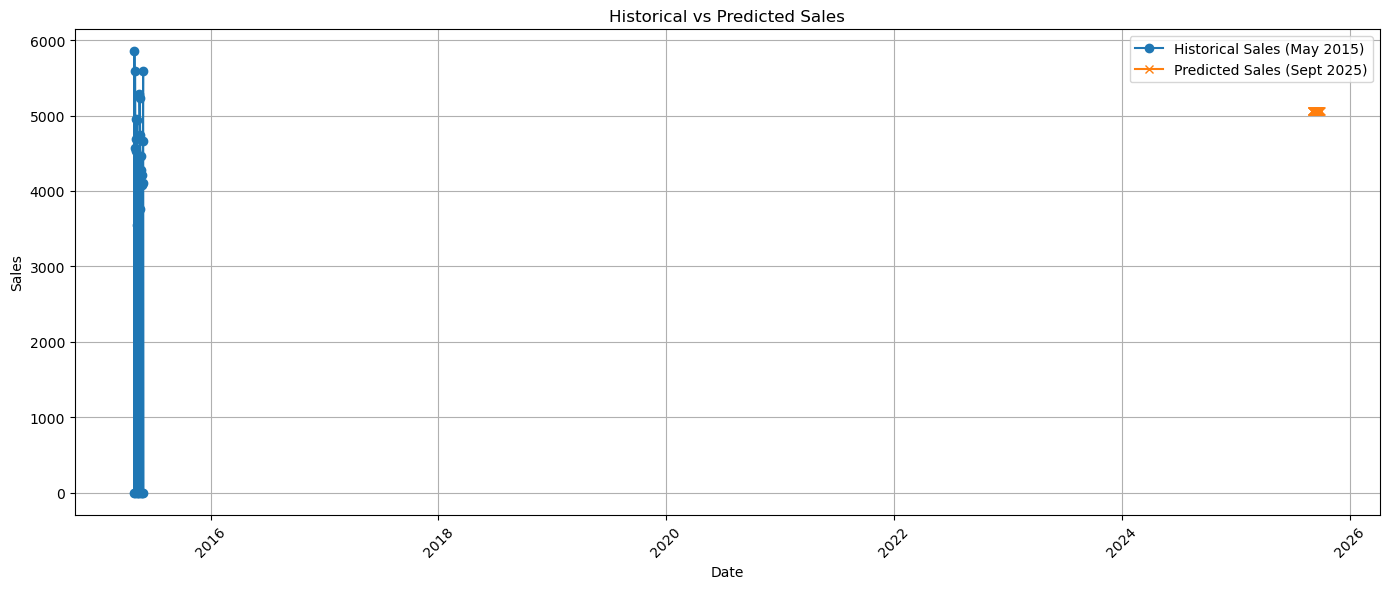

✅ Graph saved to: /Users/atulkumar/Desktop/historical_vs_predicted_sales.png


In [104]:
# ===== 1. Imports =====
import pandas as pd
import numpy as np
from joblib import load
import matplotlib.pyplot as plt

# ===== 2. Load historical data =====
hist_df = pd.read_csv('/Users/atulkumar/Desktop/rossmann_data/train.csv', parse_dates=['Date'])
hist_df = hist_df[hist_df['Store']==1]  # choose Store 1 for simplicity

# ===== 3. Select a historical month (e.g., May 2015) =====
hist_month = hist_df[(hist_df['Date'] >= '2015-05-01') & (hist_df['Date'] <= '2015-05-31')]
hist_month = hist_month[['Date','Sales']].reset_index(drop=True)

# ===== 4. Generate future month dates (Sept 2025) =====
future_dates = pd.date_range(start='2025-09-01', end='2025-09-30')
future_df = pd.DataFrame({'Date': future_dates, 'Store':1})

# ===== 5. Fill features for prediction =====
future_df['Customers'] = int(hist_month['Sales'].mean() * 0.2)  # crude estimate
future_df['Promo'] = 0
future_df['SchoolHoliday'] = 0
future_df['StoreType'] = 'c'
future_df['Assortment'] = 'a'
future_df['CompetitionDistance'] = 1000
future_df['CompetitionOpenSinceMonth'] = 1
future_df['CompetitionOpenSinceYear'] = 2000
future_df['Promo2'] = 0
future_df['Promo2SinceWeek'] = 0
future_df['Promo2SinceYear'] = 0
future_df['PromoInterval'] = 'Jan,Apr,Jul,Oct'

# ===== 6. One-hot encode categorical columns =====
future_X = pd.get_dummies(future_df.drop(['Date','Store'], axis=1), drop_first=True)

# ===== 7. Load trained model using joblib =====
model = load('/Users/atulkumar/Desktop/rossmann_rf_model.pkl')

# ===== 8. Align columns with model (fill missing columns with 0) =====
for col in model.feature_names_in_:
    if col not in future_X.columns:
        future_X[col] = 0
future_X = future_X[model.feature_names_in_]

# ===== 9. Predict sales =====
future_df['PredictedSales'] = model.predict(future_X)

# ===== 10. Combine with historical month for comparison =====
comparison_df = pd.DataFrame({
    'Date_Hist': hist_month['Date'],
    'Sales_Hist': hist_month['Sales'],
    'Date_Future': future_df['Date'],
    'PredictedSales': future_df['PredictedSales']
})

# ===== 11. Save comparison table to CSV =====
comparison_csv_path = '/Users/atulkumar/Desktop/historical_vs_predicted_sales.csv'
comparison_df.to_csv(comparison_csv_path, index=False)

print(f"✅ Comparison DataFrame saved to: {comparison_csv_path}")
print(comparison_df.head(10))  # preview first 10 rows

# ===== 12. Plot & Save comparison graph =====
plt.figure(figsize=(14,6))
plt.plot(hist_month['Date'], hist_month['Sales'], label='Historical Sales (May 2015)', marker='o')
plt.plot(future_df['Date'], future_df['PredictedSales'], label='Predicted Sales (Sept 2025)', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical vs Predicted Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# SAVE THE FIGURE (PNG)
graph_path = '/Users/atulkumar/Desktop/historical_vs_predicted_sales.png'
plt.savefig(graph_path, dpi=300)

plt.show()

print(f"✅ Graph saved to: {graph_path}")
